In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

from rDEP import DEP, EnsembleTransform, decision_boundary

In [2]:
rc('font',**{'family':'serif','serif':['Palatino'],'size': 18})
rc('text', usetex=True)

## Load double-moon dataset

In [3]:
Xtr, ytr = datasets.make_moons(n_samples=1000, noise=.1, random_state=1)
Xte, yte = datasets.make_moons(n_samples=2000, noise=.1, random_state=3)
Xtr = -Xtr
Xte = -Xte
dataset = "Double-Moon"

### Dilation-Erosion Perceptron

m =  ['2.21', '0.65']
w =  ['-1.20', '0.25']
beta = 1.00
Accuracies:
	 Training: 0.84,
	 Test: 0.83


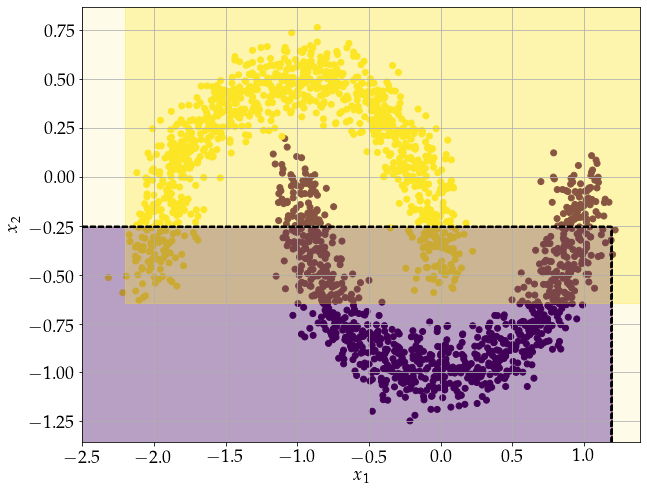

In [4]:
rede = DEP()
rede.fit(Xtr,ytr)
print("m = ",["%2.2f" % value for value in rede.ero_])
print("w = ",["%2.2f" % value for value in rede.dil_])
print("beta = %2.2f" % rede.beta)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (rede.score(Xtr,ytr),rede.score(Xte,yte)))
rede.show(Xte,yte,Nh=501)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$");
# plt.savefig("Figures/DEP-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

### Reduced Dilation-Erosion Perceptron (Ensemble - Linear and RBF SVC)

m =  ['-0.04', '0.81']
w =  ['0.00', '-0.80']
beta = 0.77
Accuracies:
	 Training: 1.00,
	 Test: 1.00


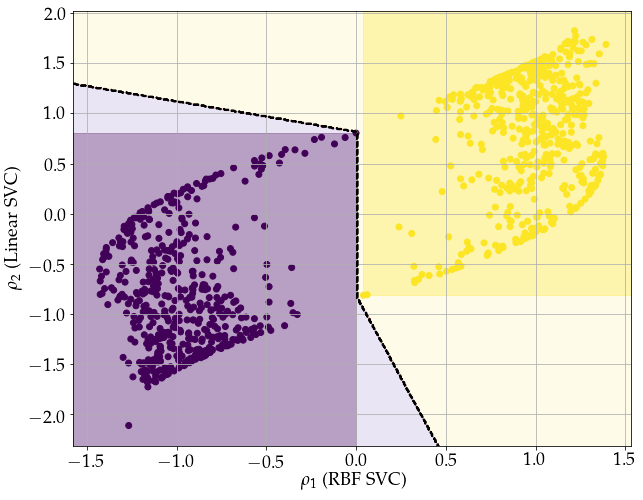

In [5]:
VotingSVC = VotingClassifier([("RBF SVC",SVC(gamma="scale")),
             ("Linear SVC",SVC(kernel="linear"))])
VotingSVC.fit(Xtr,ytr)

svcTransform = make_pipeline(EnsembleTransform(VotingSVC),StandardScaler())
svcTransform.fit(Xtr,ytr)

rhoXtr = svcTransform.transform(Xtr)
rhoXte = svcTransform.transform(Xte)

rede = DEP()
rede.fit(rhoXtr,ytr)
print("m = ",["%2.2f" % value for value in rede.ero_])
print("w = ",["%2.2f" % value for value in rede.dil_])
print("beta = %2.2f" % rede.beta)
print("Accuracies:\n\t Training: %2.2f,\n\t Test: %2.2f" % (rede.score(rhoXtr,ytr),rede.score(rhoXte,yte)))
rede.show(rhoXtr,ytr,Nh=501)
plt.xlabel(r"$\rho_1$ (RBF SVC)")
plt.ylabel(r"$\rho_2$ (Linear SVC)");
# plt.savefig("Figures/rho-DEP-Ensemble-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

r-DEP -- Training: 1.00,	 Test: 1.00
RBF SVC -- Training: 1.00,	 Test: 1.00
Linear SVC -- Training: 0.88,	 Test: 0.88
Voting SVC -- Training: 0.93,	 Test: 0.94


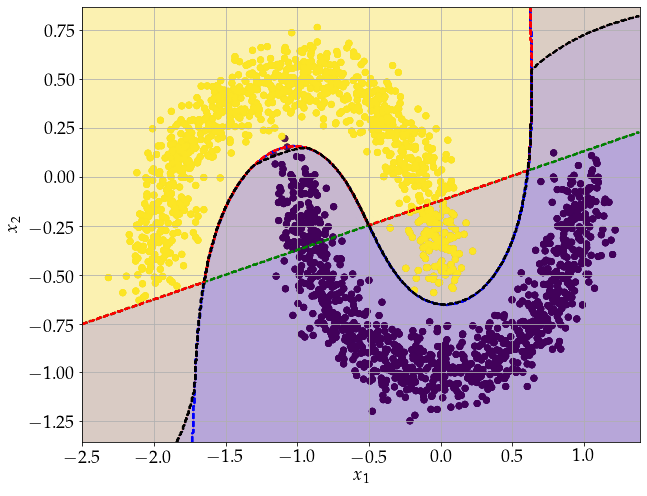

In [6]:
plt.figure(figsize=(10, 8))
rede_rho = make_pipeline(svcTransform,rede)
decision_boundary(VotingSVC.estimators_[0],Xte,yte,Nh=501,colors="blue")
decision_boundary(VotingSVC.estimators_[1],Xte,yte,Nh=501,colors="green")
decision_boundary(VotingSVC,Xte,yte,Nh=501,colors="red")
decision_boundary(rede_rho,Xte,yte,Nh=501)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
# plt.savefig("Figures/r-DEP-Ensemble-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

print("r-DEP -- Training: %2.2f,\t Test: %2.2f" % 
      (rede_rho.score(Xtr,ytr),rede_rho.score(Xte,yte)))
print("RBF SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (VotingSVC.estimators_[0].score(Xtr,ytr),VotingSVC.estimators_[0].score(Xte,yte)))
print("Linear SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (VotingSVC.estimators_[1].score(Xtr,ytr),VotingSVC.estimators_[1].score(Xte,yte)))
print("Voting SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (VotingSVC.score(Xtr,ytr),VotingSVC.score(Xte,yte)))

### Reduced Dilation-Erosion Perceptron (Bagging - RBF SVC)

m =  ['0.00', '-0.05']
w =  ['-0.09', '-0.10']
beta = 0.35
Accuracies:
	 Training: 0.998,
	 Test: 0.998


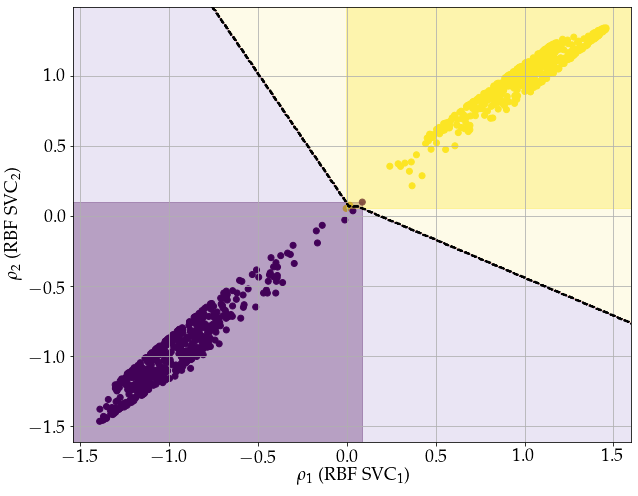

In [7]:
BaggingSVC = BaggingClassifier(base_estimator=SVC(gamma="scale"),
                               n_estimators=2,random_state=0)
BaggingSVC.fit(Xtr,ytr)

svcTransform = make_pipeline(EnsembleTransform(BaggingSVC),StandardScaler())
svcTransform.fit(Xtr,ytr)

rhoXtr = svcTransform.transform(Xtr)
rhoXte = svcTransform.transform(Xte)

rede = DEP()
rede.fit(rhoXtr,ytr)
print("m = ",["%2.2f" % value for value in rede.ero_])
print("w = ",["%2.2f" % value for value in rede.dil_])
print("beta = %2.2f" % rede.beta)
print("Accuracies:\n\t Training: %2.3f,\n\t Test: %2.3f" % (rede.score(rhoXtr,ytr),rede.score(rhoXte,yte)))
rede.show(rhoXtr,ytr,Nh=501)
plt.xlabel(r"$\rho_1$ (RBF SVC$_1$)")
plt.ylabel(r"$\rho_2$ (RBF SVC$_2$)");
# plt.savefig("Figures/rho-DEP-Bagging-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

r-DEP -- Training: 1.00,	 Test: 1.00
RBF SVC (1) -- Training: 1.00,	 Test: 1.00
RBF SVC (2) -- Training: 1.00,	 Test: 1.00
Bagging SVC -- Training: 1.00,	 Test: 1.00


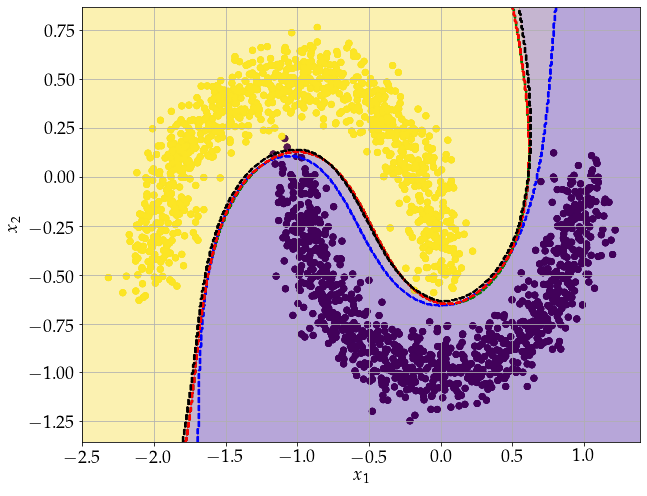

In [8]:
plt.figure(figsize=(10, 8))
rede_rho = make_pipeline(svcTransform,rede)
decision_boundary(BaggingSVC.estimators_[0],Xte,yte,Nh=501,colors="blue")
decision_boundary(BaggingSVC.estimators_[1],Xte,yte,Nh=501,colors="green")
decision_boundary(BaggingSVC,Xte,yte,Nh=501,colors="red")
decision_boundary(rede_rho,Xte,yte,Nh=501)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
# plt.savefig("Figures/r-DEP-Bagging-%s.pdf" % dataset,dpi=300,bbox_inches="tight")

print("r-DEP -- Training: %2.2f,\t Test: %2.2f" % 
      (rede_rho.score(Xtr,ytr),rede_rho.score(Xte,yte)))
print("RBF SVC (1) -- Training: %2.2f,\t Test: %2.2f" % 
      (BaggingSVC.estimators_[0].score(Xtr,ytr),BaggingSVC.estimators_[0].score(Xte,yte)))
print("RBF SVC (2) -- Training: %2.2f,\t Test: %2.2f" % 
      (BaggingSVC.estimators_[1].score(Xtr,ytr),BaggingSVC.estimators_[1].score(Xte,yte)))
print("Bagging SVC -- Training: %2.2f,\t Test: %2.2f" % 
      (BaggingSVC.score(Xtr,ytr),BaggingSVC.score(Xte,yte)))